<a href="https://colab.research.google.com/github/backiyalakshmi123/Deep-learning-and-techniques-lab/blob/main/ex%3Ano%3A5(Face%20Recognition%20using%20CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.3453 - loss: 1.8580 - val_accuracy: 0.4612 - val_loss: 1.5973
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.4007 - loss: 1.7223 - val_accuracy: 0.4612 - val_loss: 1.6307
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.3985 - loss: 1.7361 - val_accuracy: 0.4612 - val_loss: 1.6217
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.3822 - loss: 1.7499 - val_accuracy: 0.4612 - val_loss: 1.6179
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.3928 - loss: 1.7173 - val_accuracy: 0.4612 - val_loss: 1.5970
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.3870 - loss: 1.7474 - val_accuracy: 0.4612 - val_loss: 1.6257
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.3890 - loss: 1.7256 - val_accuracy: 0.4612 - val_loss: 1.6038
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3961 - loss: 1.7137 - val_accuracy: 0.4612 - val_loss: 

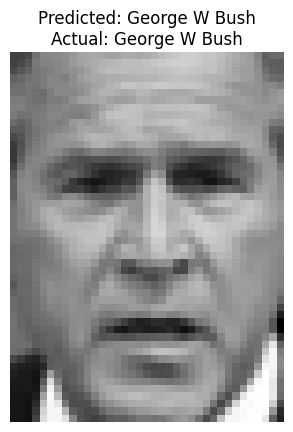

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Load predefined LFW dataset (only people with at least 70 images)
lfw_data = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_data.images
y = lfw_data.target
target_names = lfw_data.target_names
n_classes = len(target_names)

# Step 2: Preprocess the data
# Normalize image pixels to [0, 1] and reshape for CNN input
X = X.reshape(-1, X.shape[1], X.shape[2], 1) / 255.0
# One-hot encode the labels
y = to_categorical(y, n_classes)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 4: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# Step 7: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 8: Predict and visualize
def predict_and_display(index):
    sample = X_test[index].reshape(1, X.shape[1], X.shape[2], 1)
    prediction = model.predict(sample)
    predicted_label = target_names[np.argmax(prediction)]
    actual_label = target_names[np.argmax(y_test[index])]

    plt.imshow(X_test[index].reshape(X.shape[1], X.shape[2]), cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
    plt.show()

# Example: Display prediction for index 5
predict_and_display(5)

# Step 9: Save the model
model.save("lfw_face_recognition_cnn.h5")
